In [1]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report,roc_auc_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import collections
from collections import Counter
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score, precision_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler


import matplotlib.pyplot as plt
import seaborn as sns
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

#### Import preprocessed data without missing values, removed outliers, and normalized

In [2]:

train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')


In [3]:
# Define the target variable (e.g., 'target') and features (all other columns)
X_train = train.drop('readmitted', axis=1)  # Drop the target column for features
y_train = train['readmitted']  # Select the target column

X_test = test.drop('readmitted', axis=1)  # Same for test set
y_test = test['readmitted']

#### Standard Bagging classifier for highly imbalanced data



In [4]:

# Create a bagging classifier 
bagging_clf = BaggingClassifier()

# Train the bagging classifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy of the model
acc_bag = accuracy_score(y_test, y_pred)
print("Bagging Classifier - Test Accuracy:", round(acc_bag, 2))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred)))

Bagging Classifier - Test Accuracy: 0.88
Accuracy is 0.88
Precision is 0.28
Recall is 0.03
F1 score is 0.06


#### Bagging With Random Undersampling (deacreasing the size of majority set)

In [5]:
# Apply random undersampling to the training set
print("Class distribution before undersampling:", Counter(y_train))
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print("Class distribution after undersampling:", Counter(y_train_resampled))

# Create a bagging classifier with random undersampling
bagging_classifier = BaggingClassifier()

# Train the bagging classifier on the resampled training data
bagging_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate the accuracy of the model
acc_rndm = accuracy_score(y_test, y_pred)

print("Bagging Classifier with Random Undersampling - Test Accuracy:", round(acc_rndm, 2))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred)))


Class distribution before undersampling: Counter({0: 71155, 1: 9037})
Class distribution after undersampling: Counter({0: 9037, 1: 9037})
Bagging Classifier with Random Undersampling - Test Accuracy: 0.65
Precision is 0.15
Recall is 0.48
F1 score is 0.23


#### Standard Random Forest Classifier 

In [6]:
# Create a Random Forest classifier 
rf = RandomForestClassifier(n_estimators=100)

# Train the Random Forest classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy of the model
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Standard Random Forest Accuracy:",round(acc_rf, 2))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_rf)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_rf)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred_rf)))


Standard Random Forest Accuracy: 0.89
Precision is 0.45
Recall is 0.01
F1 score is 0.02


In [7]:
# Create a Random Forest Classifier with Class Weighting
rf_cw = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the Random Forest classifier on the training data
rf_cw.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cw = rf_cw.predict(X_test)

# Calculate the accuracy of the model
acc_cw = accuracy_score(y_test, y_pred_cw)
print("Random Forest with Class Weighting Accuracy:",round(acc_cw, 2))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_cw)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_cw)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred_cw)))


Random Forest with Class Weighting Accuracy: 0.89
Precision is 0.68
Recall is 0.01
F1 score is 0.01


#### Random Forest with Random Undersampling

In [8]:
# Apply random undersampling to the training set
print("Class distribution before undersampling:", Counter(y_train))
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print("Class distribution after undersampling:", Counter(y_train_resampled))
# Create a Random Forest classifier with random undersampling
rf_rus = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the resampled training data
rf_rus.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rus = rf_rus.predict(X_test)

# Calculate the accuracy of the model
acc_rus = accuracy_score(y_test, y_pred_rus)
print("Random Forest with Random Undersampling Accuracy:",round(acc_rus,2))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred_rus)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred_rus)))
print("F1 score is {0:.2f}".format(f1_score(y_test, y_pred_rus)))

Class distribution before undersampling: Counter({0: 71155, 1: 9037})
Class distribution after undersampling: Counter({0: 9037, 1: 9037})
Random Forest with Random Undersampling Accuracy: 0.63
Precision is 0.17
Recall is 0.60
F1 score is 0.26


#### Evaluation of Random forest with undersampling

Only 17% of the patients flagged as high risk for readmission were actually readmitted. This suggests the model generates a high number of false positives.
Recall (0.60):

The model successfully identifies 60% of the actual readmissions, which is decent. However, missing the remaining 40% (false negatives) could still have serious implications.


In [9]:
# Evaluate the model

# Calculate and print the accuracy
acc_rus = accuracy_score(y_test, y_pred_rus)
print("Random Forest with Random Undersampling Accuracy: {:.2f}".format(acc_rus))

# Calculate precision, recall, and F1-score for binary classification (assuming labels 0 and 1)
precision = precision_score(y_test, y_pred_rus)
recall = recall_score(y_test, y_pred_rus)
f1 = f1_score(y_test, y_pred_rus)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Print the classification report for detailed metrics across all classes
report = classification_report(y_test, y_pred_rus)
print("\nClassification Report:\n", report)



Random Forest with Random Undersampling Accuracy: 0.63
Precision: 0.17
Recall: 0.60
F1 Score: 0.26

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     17836
           1       0.17      0.60      0.26      2213

    accuracy                           0.63     20049
   macro avg       0.55      0.62      0.51     20049
weighted avg       0.84      0.63      0.70     20049



Confusion Matrix:
 [[11271  6565]
 [  883  1330]]


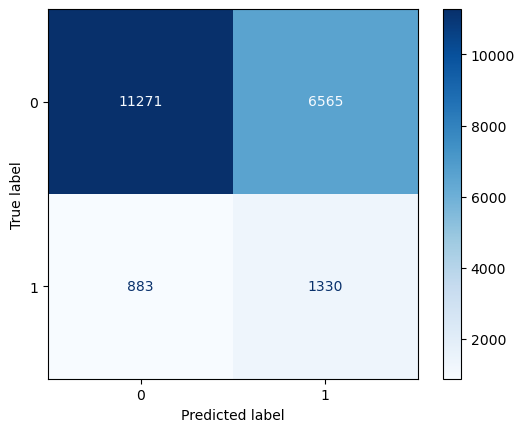

In [10]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rus)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_rus.classes_)
disp.plot(cmap='Blues')

#### XGBoost Classifier with SMOTE + ENN oversampler

First, scale continious numerical values 

In [11]:

# Identify the binary and continuous columns

# List of continuous columns that you want to scale
continuous_columns = ['age', 'time_in_hospital','num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient_log',
       'number_emergency_log', 'number_inpatient_log']

# Separate the continuous features
X_train_continuous = X_train[continuous_columns]
X_test_continuous = X_test[continuous_columns]

# Apply StandardScaler to the continuous features
scaler = StandardScaler()
X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
X_test_continuous_scaled = scaler.fit_transform(X_test_continuous)


# Convert the scaled features back to a DataFrame
X_train_continuous_scaled = pd.DataFrame(X_train_continuous_scaled, columns=continuous_columns)
X_test_continuous_scaled = pd.DataFrame(X_test_continuous_scaled, columns=continuous_columns)

# Concatenate the scaled continuous columns with the rest of the data
X_train_scaled = pd.concat([X_train.drop(continuous_columns, axis=1), X_train_continuous_scaled], axis=1)
X_test_scaled = pd.concat([X_test.drop(continuous_columns, axis=1), X_test_continuous_scaled], axis=1)



##### Apply SMOTEENN to training data

In [15]:

counter = collections.Counter(y_train)
print('Before', counter)
# oversampling the train dataset using SMOTE + ENN
smote = SMOTEENN()
X_train_smenn, y_train_smenn = smote.fit_resample (X_train_scaled, y_train)
counter = collections.Counter (y_train_smenn)
print('After', counter)


Before Counter({0: 71155, 1: 9037})
After Counter({1: 70864, 0: 29937})


##### XGBoost classifier

Results With Oversampling Smote + ENN
XGBoost Accuracy: 0.47
Kappa Score: 0.06
F1 Score: 0.24
Recall: 0.74
Precision: 0.14


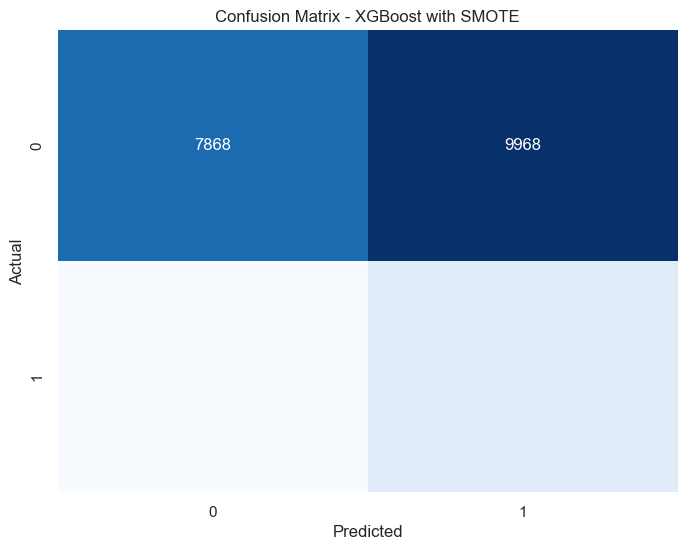

In [16]:

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=10, n_jobs=-1, learning_rate=0.1, random_state=42)
xgb_classifier.fit(X_train_smenn, y_train_smenn)

# Make predictions using the model
y_pred = xgb_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", round(accuracy,2))
print("Kappa Score:", round(kappa,2))
print("F1 Score:", round(f1,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after oversampling
counter = Counter(y_train_smote)
print('Before:', Counter(y_train))
print('After SMOTE:', counter)


Before: Counter({0: 71155, 1: 9037})
After SMOTE: Counter({0: 71155, 1: 71155})


Results With Oversampling Smote + ENN
XGBoost Accuracy: 0.48
Kappa Score: 0.05
F1 Score: 0.23
Recall: 0.69
Precision: 0.13


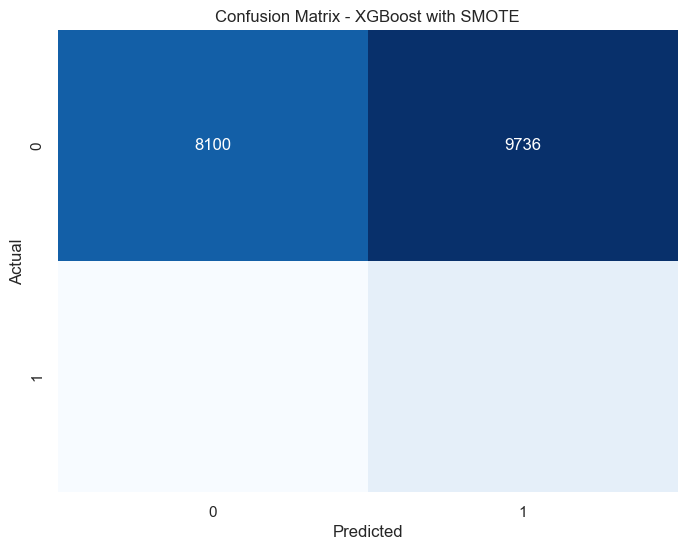

In [18]:

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=10, n_jobs=-1, learning_rate=0.1, random_state=42)
xgb_classifier.fit(X_train_smote, y_train_smote)

# Make predictions using the model
y_pred = xgb_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", round(accuracy,2))
print("Kappa Score:", round(kappa,2))
print("F1 Score:", round(f1,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Changing threshold 

In [125]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize your XGBoost model
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 10, 50],  # Adjusting for imbalance
}

grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='f1',
    cv=skf,
    n_jobs=-1,
    verbose=2
)
# Fit the grid search
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters and F1 score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score from GridSearchCV:", grid_search.best_score_)






Fitting 5 folds for each of 81 candidates, totalling 405 fits


[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10; total time=   6.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1; total time=   6.7s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1; total time=   6.9s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1; total time=   6.9s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1; total time=   7.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10; total time=   6.9s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10; total time=   7.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=1; total time=   7.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10; total time=   7.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight=10; total time=   8.5s
[CV] END learni

ValueError: feature_names mismatch: ['gender', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_7', 'discharge_disposition_id_1', 'discharge_disposition_id_2', 'discharge_disposition_id_3', 'discharge_disposition_id_7', 'discharge_disposition_id_11', 'discharge_disposition_id_12', 'discharge_disposition_id_13', 'discharge_disposition_id_16', 'discharge_disposition_id_18', 'discharge_disposition_id_22', 'admission_source_id_1', 'admission_source_id_4', 'admission_source_id_5', 'admission_source_id_7', 'admission_source_id_8', 'admission_source_id_9', 'admission_source_id_11', 'diag1_1', 'diag1_2', 'diag1_3', 'diag1_4', 'diag1_5', 'diag1_6', 'diag1_7', 'diag1_8', 'diag1_9', 'diag1_10', 'diag1_11', 'diag1_12', 'diag1_13', 'diag1_14', 'diag1_16', 'diag1_17', 'diag1_18', 'diag2_1', 'diag2_2', 'diag2_3', 'diag2_4', 'diag2_5', 'diag2_6', 'diag2_7', 'diag2_8', 'diag2_9', 'diag2_10', 'diag2_11', 'diag2_12', 'diag2_13', 'diag2_14', 'diag2_16', 'diag2_17', 'diag2_18', 'diag3_1', 'diag3_2', 'diag3_3', 'diag3_4', 'diag3_5', 'diag3_6', 'diag3_7', 'diag3_8', 'diag3_9', 'diag3_10', 'diag3_11', 'diag3_12', 'diag3_13', 'diag3_14', 'diag3_16', 'diag3_17', 'diag3_18', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_unknown', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient_log', 'number_emergency_log', 'number_inpatient_log'] ['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_7', 'discharge_disposition_id_1', 'discharge_disposition_id_2', 'discharge_disposition_id_3', 'discharge_disposition_id_7', 'discharge_disposition_id_11', 'discharge_disposition_id_12', 'discharge_disposition_id_13', 'discharge_disposition_id_16', 'discharge_disposition_id_18', 'discharge_disposition_id_22', 'admission_source_id_1', 'admission_source_id_4', 'admission_source_id_5', 'admission_source_id_7', 'admission_source_id_8', 'admission_source_id_9', 'admission_source_id_11', 'diag1_1', 'diag1_2', 'diag1_3', 'diag1_4', 'diag1_5', 'diag1_6', 'diag1_7', 'diag1_8', 'diag1_9', 'diag1_10', 'diag1_11', 'diag1_12', 'diag1_13', 'diag1_14', 'diag1_16', 'diag1_17', 'diag1_18', 'diag2_1', 'diag2_2', 'diag2_3', 'diag2_4', 'diag2_5', 'diag2_6', 'diag2_7', 'diag2_8', 'diag2_9', 'diag2_10', 'diag2_11', 'diag2_12', 'diag2_13', 'diag2_14', 'diag2_16', 'diag2_17', 'diag2_18', 'diag3_1', 'diag3_2', 'diag3_3', 'diag3_4', 'diag3_5', 'diag3_6', 'diag3_7', 'diag3_8', 'diag3_9', 'diag3_10', 'diag3_11', 'diag3_12', 'diag3_13', 'diag3_14', 'diag3_16', 'diag3_17', 'diag3_18', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_unknown', 'number_outpatient_log', 'number_emergency_log', 'number_inpatient_log']

Results With Oversampling Smote + ENN
XGBoost Accuracy: 0.43
Kappa Score: 0.06
F1 Score: 0.24
Recall: 0.8
Precision: 0.14


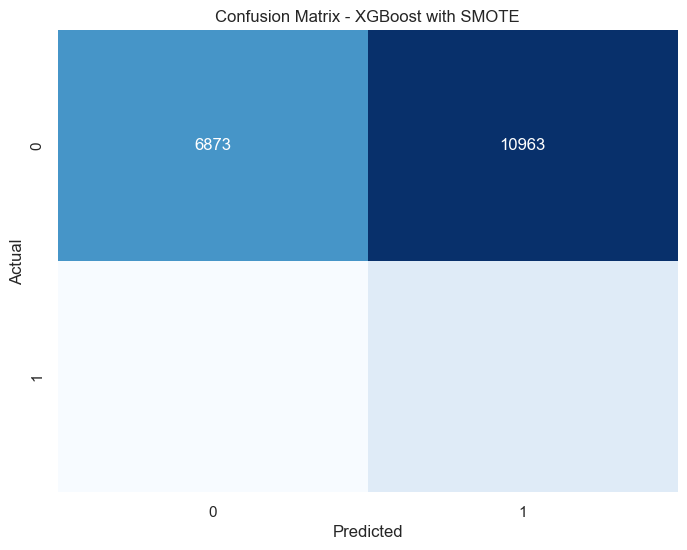

In [20]:
#Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'scale_pos_weight': 1}
#Best F1 Score from GridSearchCV: 0.9517544745442411
# Train the model with the best parameters on the full training data
# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=200, max_depth=15, n_jobs=-1, learning_rate=0.1, random_state=42,scale_pos_weight=1)
xgb_classifier.fit(X_train_smenn, y_train_smenn)

# Make predictions using the model
y_pred = xgb_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Results With Oversampling Smote + ENN")
print("XGBoost Accuracy:", round(accuracy,2))
print("Kappa Score:", round(kappa,2))
print("F1 Score:", round(f1,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter distribution
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [10, 15, 20],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [1, 10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search with F1 scoring
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    scoring='f1',
    n_iter=50,  # Number of random combinations
    cv=5,  # Stratified 5-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search
random_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best F1 Score from RandomizedSearchCV:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:02:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:02:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:02:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:02:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  32.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  34.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  33.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  36.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  46.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  47.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  48.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  49.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  33.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  35.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time=  29.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  48.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:03:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  56.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time=  31.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time=  32.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  58.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  57.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  58.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time=  32.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time=  32.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  18.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  19.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  37.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  22.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  43.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  42.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  21.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  43.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  42.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:04:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  20.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  22.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  23.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  24.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  23.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  22.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  27.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  30.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  31.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  30.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  31.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  33.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  35.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  37.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:05:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  36.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  31.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  37.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=  15.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  44.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=  20.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=  20.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  44.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=  20.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  41.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=  18.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  14.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  42.9s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  14.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  14.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  14.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=10, n_estimators=100, scale_pos_weight=20, subsample=1.0; total time=  14.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:06:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  30.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  31.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  30.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  31.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  29.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  31.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  34.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  35.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  35.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  35.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  34.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  35.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  35.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  35.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  36.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:07:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  43.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  43.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  43.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  44.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  44.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time=  49.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.0min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  30.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  32.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.1min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  32.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.1min
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  31.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=  30.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.0min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  33.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  34.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  35.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  35.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=20, subsample=1.0; total time=  36.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  41.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:09:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  23.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  23.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  42.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  23.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  43.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  42.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  24.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  44.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  24.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  24.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  39.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  25.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  24.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  49.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  48.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  47.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:10:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=  48.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  26.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  26.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  33.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  34.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  34.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  34.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  33.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  17.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:11:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  48.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  49.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  51.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  50.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time=  50.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time= 1.0min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time= 1.1min
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time= 1.2min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:12:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time= 1.2min
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=1.0; total time= 1.2min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:13:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:13:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  44.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.3min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:13:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.3min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:13:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.3min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:13:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:13:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.4min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:13:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  39.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time= 1.4min
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  41.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  40.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  36.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  40.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  38.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  33.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  34.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  34.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:14:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  45.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  28.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  51.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  54.8s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  53.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=300, scale_pos_weight=20, subsample=0.8; total time=  52.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  35.9s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  35.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  33.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  34.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 1.2min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:16:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 1.3min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:16:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 1.4min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:16:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 1.9min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  32.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 2.4min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 2.4min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 2.4min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 2.4min


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  41.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:17:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 1.4min
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  32.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  30.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  32.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  29.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=20, min_child_weight=10, n_estimators=300, scale_pos_weight=10, subsample=0.8; total time= 1.4min
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  30.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  31.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  14.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  14.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  14.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  15.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  15.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  29.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=200, scale_pos_weight=20, subsample=0.8; total time=  30.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  15.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  16.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  17.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  16.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=  18.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:18:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  35.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  41.5s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  42.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  39.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  41.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  41.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  40.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  40.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  20.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  20.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  21.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  21.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=  21.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  40.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  18.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  39.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:19:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  18.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  24.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  25.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  26.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  25.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  21.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  23.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  21.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  23.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  33.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  32.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  32.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  33.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  29.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=  34.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  34.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  15.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  34.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:20:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.5s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  15.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  15.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  33.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=  35.6s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.8s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=  16.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time=  36.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  25.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  32.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=  32.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time=  43.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time=  45.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:21:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time=  45.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=1.0; total time=  47.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:22:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  11.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  11.8s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  11.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=  10.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=   8.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=100, scale_pos_weight=20, subsample=0.8; total time=

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:22:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 20, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best F1 Score from RandomizedSearchCV: 0.9105869637145838
